In [1]:
from model.model import EVSpaceModel
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
import seaborn as sns
import numpy as np


In [2]:
CP_loc='inputs\CP_locs.csv'
POI_file = 'inputs/POIs.csv'
speed = 0.3

model = EVSpaceModel()  #CP_loc=CP_loc,POIs=POI_file
model.run_model(1000) #24*365   

{'output': {'output_dir': 'data//', 'model_reporters': {'av_charge': 'av_charge', 'completed_trip': 'completed_trip', 'dead_cars': 'dead_cars', 'charge_load': 'charge_load', 'date_time': 'date_time', 'av_moving': 'av_moving', 'av_home': 'av_home', 'av_work': 'av_work', 'av_random': 'av_random'}, 'agent_reporters': {'charge': 'charge', 'last_location': 'last_location', 'next_location': 'next_location', 'pos': 'pos', 'charging': 'charging', 'wait': 'wait', 'moving': 'moving', 'completed_trip': 'completed_trip', 'dist_moved': 'dist_moved'}}, 'model_params': {'start_date': '2022-01-01', 'width': 5.0, 'height': 5.0, 'model_name': 0, 'tol': 0.01, 'POI_file': 'None', 'time_increment': 1, 'price': 0, 'location_probs': 'inputs/location_probs.csv'}, 'agent_params': {'EVs': {'Type': 'EV', 'from_file': False, 'num_agents': 100, 'discharge_rate': 0.04, 'MoveType': 'loc', 'charging': False, 'max_range': 1, 'speed': 0.5, 'home_stay': 12, 'work_stay': 8, 'rand_stay': 3, 'completed_trip': 0, 'dist_move

In [3]:
# model.schedule.step()

In [4]:
# for self in model.schedule.agents:
#     # self = model.schedule.agents[44] 
#     (not self.moving) and (self.last_location == 'work' or self.last_location == 'home')
#     locations_names_new = self.update_possible_locations()
#     loc_probs_hour = self.model.location_probs.loc[self.model.date_time.hour].to_dict()
#     loc_probs = np.array([loc_probs_hour[x] for x in locations_names_new])
#     self.next_location = np.random.choice(locations_names_new, p=loc_probs/sum(loc_probs))
#     # model.date_time.hour
#     self.next_location
#     self.locations[self.next_location]
   
#     try:
#          self.step()
#     except:
#         print('x')
#         print(self.__dict__)


In [5]:
self

EV: 99

In [6]:
self.next_location 

'random'

In [7]:
mdf = model.datacollector.get_model_vars_dataframe()
adf = model.datacollector.get_agent_vars_dataframe()
# adf.to_csv('xx.csv')
mdf.to_csv('data/mdf.csv')
adf.to_csv('data/adf.csv')

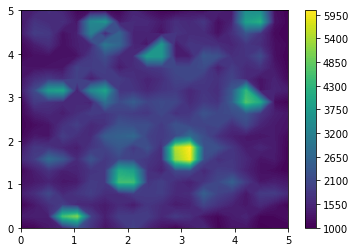

In [8]:
GP = model.datacollector_gridpoints.get_agent_vars_dataframe()
# XY = pd.DataFrame(GP['pos'].tolist()).rename({0:'X',1:'Y'},axis=1)

grid_spacing = model.cfg['agent_params']['Grid_Points']['grid_spacing']

GP_tot = GP.reset_index().groupby('AgentID').agg({'cars_passing':sum,'X':'first','Y':'first'})
# fig, ax = plt.subplots()
# sns.scatterplot(data=GP_tot, x='X',y='Y',c=GP_tot['cars_passing'])

X = GP_tot['X'].values.reshape((-1,grid_spacing))
Y = GP_tot['Y'].values.reshape((-1,grid_spacing))
Z = GP_tot['cars_passing'].values.reshape((-1,grid_spacing))

fig, ax = plt.subplots()
# cs = ax.contourf(X, Y, Z, locator=ticker.LogLocator(2))
cs = ax.contourf(X, Y, Z, 100)
# cs = ax.contourf(X, Y, Z, locator=ticker.LogLocator(2))
cbar = plt.colorbar(cs)


In [9]:
mdf

,av_charge,completed_trip,dead_cars,charge_load,date_time,av_moving,av_home,av_work,av_random
0,0.763031,0,0.0,0.0000,2022-01-01 00:00:00,1.00,0.00,0.00,0.00
1,0.763031,0,0.0,0.0000,2022-01-01 01:00:00,1.00,0.00,0.00,0.00
2,0.762231,0,0.0,0.0000,2022-01-01 02:00:00,1.00,0.00,0.00,0.00
3,0.759031,0,0.0,0.0000,2022-01-01 03:00:00,1.00,0.00,0.00,0.00
4,0.746631,2,0.0,0.0000,2022-01-01 04:00:00,0.98,0.01,0.01,0.00
...,...,...,...,...,...,...,...,...,...
996,0.709800,8,0.0,0.0397,2022-02-11 12:00:00,0.30,0.30,0.18,0.10
997,0.711200,5,0.0,0.0379,2022-02-11 13:00:00,0.29,0.28,0.21,0.09
998,0.710700,9,0.0,0.0379,2022-02-11 14:00:00,0.29,0.28,0.22,0.11
999,0.710100,7,0.0,0.0343,2022-02-11 15:00:00,0.29,0.31,0.21,0.08


,av_charge,completed_trip,dead_cars,charge_load,av_moving,av_home,av_work,av_random
hour,,,,,,,,
0,0.683549,6.714286,0.000000,0.032624,0.326190,0.270952,0.188571,0.089762
1,0.684197,5.857143,0.000000,0.032674,0.333571,0.270238,0.184524,0.087619
2,0.684630,6.476190,0.000000,0.032724,0.327619,0.268810,0.185714,0.093810
3,0.684929,7.000000,0.000000,0.032686,0.322381,0.272381,0.186667,0.091190
4,0.685455,5.809524,0.000000,0.032814,0.333333,0.267143,0.181429,0.093333
5,0.685313,6.285714,0.000000,0.033162,0.335238,0.266905,0.183095,0.092381
6,0.684695,6.428571,0.000000,0.033083,0.338571,0.263333,0.184762,0.090476
7,0.684063,6.285714,0.000000,0.033198,0.340714,0.259762,0.184286,0.090238
8,0.683701,6.785714,0.000000,0.033343,0.333095,0.265952,0.185476,0.092857


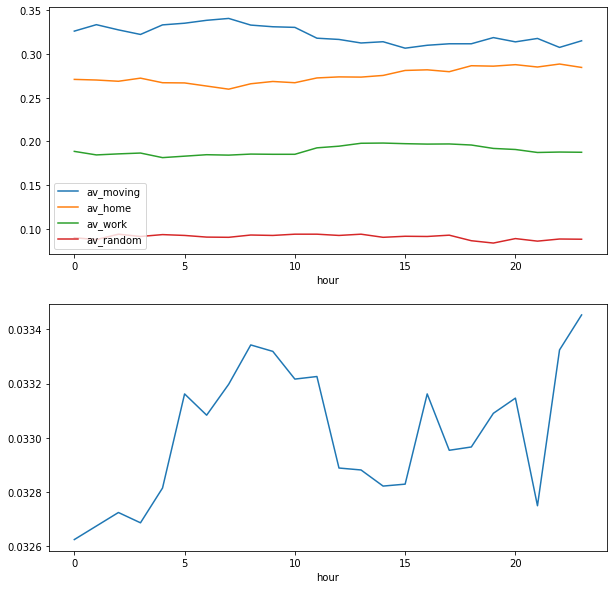

In [10]:
import pandas as pd
mdf['hour'] = pd.to_datetime(mdf.date_time).dt.hour
hourly = mdf.groupby('hour').mean()

fig, ax = plt.subplots(2, figsize=(10,10))
hourly[['av_moving','av_home','av_work','av_random']].plot(ax=ax[0])
hourly['charge_load'].plot(ax=ax[1])
hourly